<a href="https://colab.research.google.com/github/Pushkar1-GitHub/AI-in-Biology/blob/main/Another_copy_of_5_Simple_Linear_Regression_Lion_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

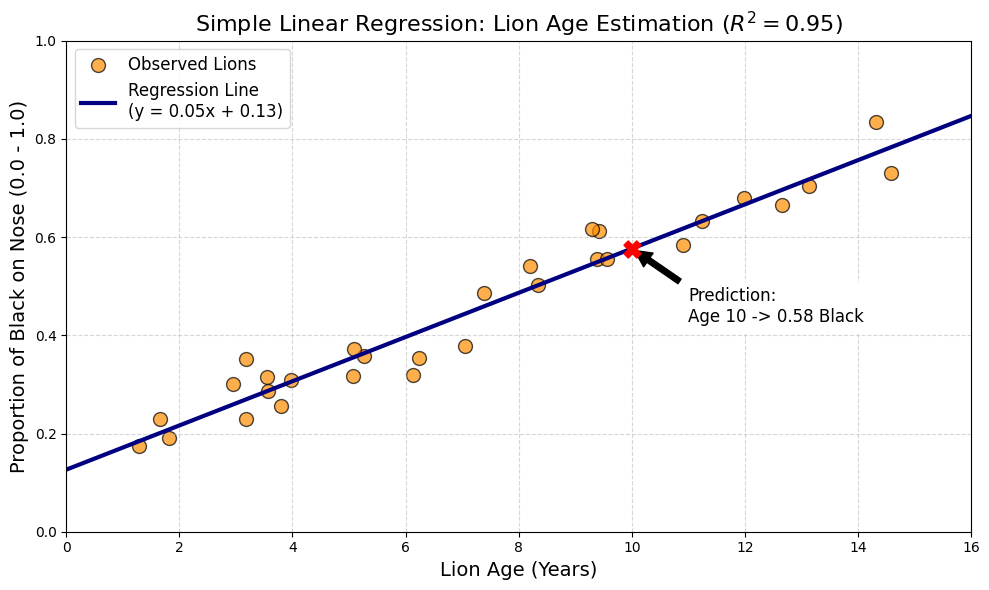

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Simulate Data (Lion Age vs. Nose Color)
np.random.seed(42)  # For reproducible results

# Generate random ages for 30 lions (between 1 and 15 years)
# Reshape is needed because sklearn expects a 2D array for X
X_age = np.random.uniform(1, 15, 30).reshape(-1, 1)

# Generate nose blackness (Y) based on a linear relationship + biological noise
# True Relationship: Blackness = 0.05 * Age + 0.1
noise = np.random.normal(0, 0.05, 30).reshape(-1, 1)
Y_nose = (0.05 * X_age) + 0.1 + noise

# Clip values to ensure they stay within logical bounds (0.0 to 1.0)
Y_nose = np.clip(Y_nose, 0.0, 1.0)

# 2. Fit the Linear Regression Model
model = LinearRegression()
model.fit(X_age, Y_nose)

# Get parameters for the equation text
slope = model.coef_[0][0]
intercept = model.intercept_[0]
r_squared = model.score(X_age, Y_nose)

# 3. Create the Plot
plt.figure(figsize=(10, 6))

# Scatter plot of the actual data points
plt.scatter(X_age, Y_nose, color='darkorange', label='Observed Lions', s=100, alpha=0.7, edgecolors='black')

# Plot the regression line
X_range = np.linspace(0, 16, 100).reshape(-1, 1)
Y_pred = model.predict(X_range)
plt.plot(X_range, Y_pred, color='navy', linewidth=3, label=f'Regression Line\n(y = {slope:.2f}x + {intercept:.2f})')

# Formatting the graph
plt.title(f'Simple Linear Regression: Lion Age Estimation ($R^2 = {r_squared:.2f}$)', fontsize=16)
plt.xlabel('Lion Age (Years)', fontsize=14)
plt.ylabel('Proportion of Black on Nose (0.0 - 1.0)', fontsize=14)
plt.xlim(0, 16)
plt.ylim(0, 1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12, loc='upper left')

# Optional: Annotate a specific prediction (e.g., Age 10)
example_age = 10
predicted_nose = model.predict([[example_age]])[0][0]
plt.scatter([example_age], [predicted_nose], color='red', zorder=5, s=150, marker='X')
plt.annotate(f'Prediction:\nAge {example_age} -> {predicted_nose:.2f} Black',
             xy=(example_age, predicted_nose),
             xytext=(example_age + 1, predicted_nose - 0.15),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, backgroundcolor='white')

# Show the plot
plt.tight_layout()
plt.show()